In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/1.01.%20Simple%20linear%20regression.csv"
data = pd.read_csv(url)

x = torch.tensor(data["GPA"].values, dtype=float)
y = torch.tensor(data["SAT"].values, dtype=float)


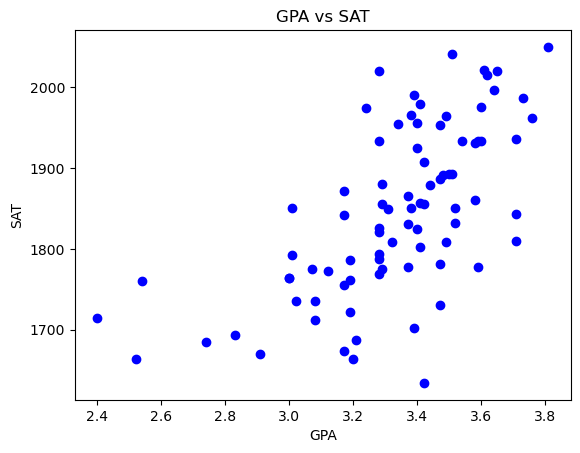

In [2]:
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.title('GPA vs SAT')
plt.show()

In [3]:
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
func = w1*(x**2) + w2*x + b

learning_rate = .007
iterations = 1000000

for iteration in range(iterations):
    func = w1*(x**2) + w2*x + b
    loss = torch.mean((y-func)**2)
    loss.backward()
    with torch.no_grad():
        w1 -= w1.grad * learning_rate
        w1.grad.zero_()
        w2 -= w2.grad * learning_rate
        w2.grad.zero_()
        b -= b.grad * learning_rate
        b.grad.zero_()
    
    w1_final = w1.item()
    w2_final = w2.item()
    b_final = b.item()
    loss_final = loss.item()

    # Print loss every 100 epochs
    if (iteration+1) % 10000 == 0:
        print(f"iterations {iterations+1}/{iterations}, Loss: {loss.item():.4f}")

print (w2_final, w1_final, b_final, loss_final)


iterations 1000001/1000000, Loss: 6672.2361
iterations 1000001/1000000, Loss: 6658.9800
iterations 1000001/1000000, Loss: 6646.0986
iterations 1000001/1000000, Loss: 6633.5214
iterations 1000001/1000000, Loss: 6621.2641
iterations 1000001/1000000, Loss: 6609.3294
iterations 1000001/1000000, Loss: 6597.7225
iterations 1000001/1000000, Loss: 6586.3742
iterations 1000001/1000000, Loss: 6575.3396
iterations 1000001/1000000, Loss: 6564.5719
iterations 1000001/1000000, Loss: 6554.1298
iterations 1000001/1000000, Loss: 6543.9141
iterations 1000001/1000000, Loss: 6533.9856
iterations 1000001/1000000, Loss: 6524.3058
iterations 1000001/1000000, Loss: 6514.8744
iterations 1000001/1000000, Loss: 6505.7026
iterations 1000001/1000000, Loss: 6496.7040
iterations 1000001/1000000, Loss: 6488.0233
iterations 1000001/1000000, Loss: 6479.4948
iterations 1000001/1000000, Loss: 6471.2537
iterations 1000001/1000000, Loss: 6463.1559
iterations 1000001/1000000, Loss: 6455.3348
iterations 1000001/1000000, Loss

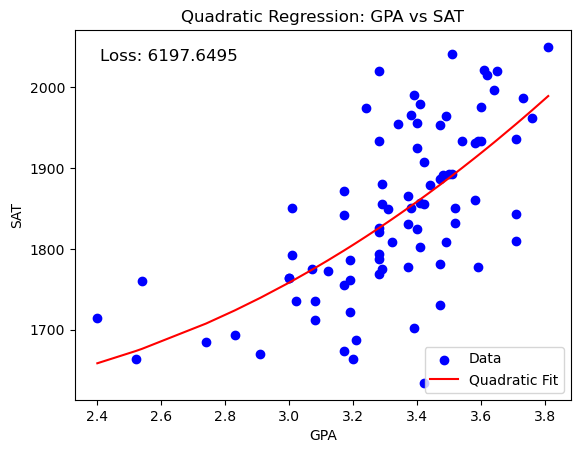

In [4]:
# Compute quadratic regression line
x_np = x.numpy()
y_line = w1_final * x_np**2 + w2_final * x_np + b_final

# Compute final loss using the final model parameters
loss_final = torch.mean((y - (w1_final*x**2 + w2_final*x + b_final))**2).item()

# Scatter plot of original data
plt.scatter(x_np, y.numpy(), color='blue', label='Data')

# Plot quadratic regression curve (smooth line)
x_sorted, y_sorted = zip(*sorted(zip(x_np, y_line)))  # Sort for proper curve
plt.plot(x_sorted, y_sorted, color='red', label='Quadratic Fit')

# Put final loss in top-left corner of the plot
plt.text(0.05, 0.95, f'Loss: {loss_final:.4f}', 
         fontsize=12, color='black', transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left')

# Labels, title, and legend
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.title('Quadratic Regression: GPA vs SAT')
plt.legend()
plt.show()
